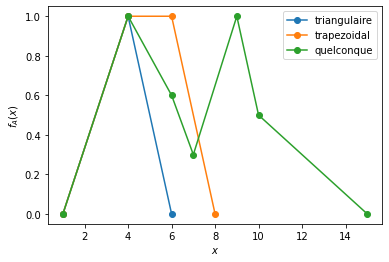

In [67]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

sef = {
    "triangulaire": np.array([(1, 0), (4, 1), (6, 0)]),
    "trapezoidal": np.array([(1, 0), (4, 1), (6, 1), (8, 0)]),
    "quelconque": np.array(
        [(1, 0), (4, 1), (6, 0.6), (7, 0.3), (9, 1), (10, 0.5), (15, 0)]
    ),
}


def calcule_degre_appartenance(x: int, sef: np.ndarray):
    # x_values = sef[:, 0]
    return np.any(x == sef[:, 0])


def plot_sef(sef: np.ndarray, name=None):
    x_values = sef[:, 0]
    y_values = sef[:, 1]

    plt.plot(x_values, y_values, marker="o", linestyle="-", label=name)
    plt.xlabel("$x$")
    plt.ylabel("$f_A(x)$")
    plt.legend()
    # plt.show()


def plot_sefs(sefs: dict):
    for name, values in sefs.items():
        plot_sef(values, name)
    plt.show()


plot_sefs(sef)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


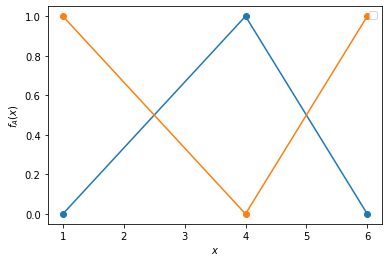

In [50]:
import copy


def complementary(sef):
    sef_copy = sef.copy()
    sef_copy[:, 1] = 1 - sef_copy[:, 1]
    return sef_copy


plot_sef(sef["triangulaire"])
plot_sef(complementary(sef['triangulaire']))

In [51]:
complementaries = {name: complementary(sef[name]) for name in sef.keys()}
complementaries

{'triangulaire': array([[1, 1],
        [4, 0],
        [6, 1]]),
 'trapezoidal': array([[1, 1],
        [4, 0],
        [6, 0],
        [8, 1]]),
 'quelconque': array([[ 1. ,  1. ],
        [ 4. ,  0. ],
        [ 6. ,  0.4],
        [ 7. ,  0.7],
        [ 9. ,  0. ],
        [10. ,  0.5],
        [15. ,  1. ]])}

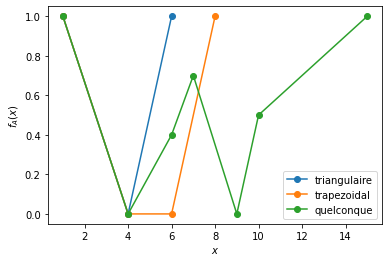

In [52]:
plot_sefs(complementaries)

In [76]:
class TNorme:
    @staticmethod
    def probabiliste(x, y):
        return x * y

    @staticmethod
    def lukasiewiez(x, y):
        return np.maximum(x + y - 1, 0)

    @staticmethod
    def zadeh(x, y):
        return np.minimum(x, y)

    @staticmethod
    def hamacher(x, y):
        return np.where(x == y == 0, 0, (x * y) / (x + y - x * y))

    @staticmethod
    def drastique(x, y):
        if x == 1:
            return y
        elif y == 1:
            return x
        else:
            return 0


class TConorme:
    @staticmethod
    def probabiliste(x, y):
        return x + y - x * y

    @staticmethod
    def lukasiewiez(x, y):
        return np.minimum(x + y, 1)

    @staticmethod
    def zadeh(x, y):
        return np.maximum(x, y)

    @staticmethod
    def hamacher(x, y):
        return (x + y) / (1 + x * y)

    @staticmethod
    def drastique(x, y):
        if x == 0:
            return y
        elif y == 0:
            return x
        else:
            return 1

tu fais des t normes à chaque point
y a des tnormes avec des min, pour chaque point, 
faut interpoler xd

In [130]:
def intersection(a, b, t_norme, step=100):
    x = list(a[:, 0]) + list(b[:, 0])
    x_min = np.min(x)
    x_max = np.max(x)
    x = np.linspace(x_min, x_max, step)
    f_a = np.interp(x, a[:, 0], a[:, 1])
    f_b = np.interp(x, b[:, 0], b[:, 1])
    f_inter = t_norme(f_a, f_b)
    return np.vstack((x, f_inter)).T

def union(a, b, t_conorme, step=100):
    x = list(a[:, 0]) + list(b[:, 0])
    x_min = np.min(x)
    x_max = np.max(x)
    x = np.linspace(x_min, x_max, step)
    f_a = np.interp(x, a[:, 0], a[:, 1])
    f_b = np.interp(x, b[:, 0], b[:, 1])
    f_inter = t_conorme(f_a, f_b)
    return np.vstack((x, f_inter)).T

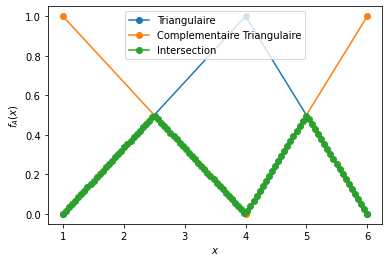

In [134]:
plot_sefs({
    "Triangulaire": sef['triangulaire'],
    "Complementaire Triangulaire" : complementaries['triangulaire'],
    "Intersection": intersection(sef['triangulaire'], complementaries['triangulaire'], TNorme.zadeh)
})

In [132]:
plot_sefs({
    "Triangulaire": sef['triangulaire'],
    "Complementaire Triangulaire" : complementaries['triangulaire'],
    "Intersection": union(sef['triangulaire'], complementaries['triangulaire'], TConorme.zadeh)
})

## Principe d'extension

In [ ]:
class Phi:
    def __init__(self, func):
        self.func = func
        # return x ** 2

    def calcule(self, y):
        return self.func(y)
    
    def antecedent(self, y):
        ...
    

In [ ]:
def f(x)
    return x**2
def f_inv(x):
    if x<0 : return {}
    else: "oui"

In [164]:
import sympy as sp

# Define a variable and a function
x = sp.symbols('x')
f_x = 2 * x + 3

# Find the inverse function symbolically
y = sp.symbols('y')
inverse = sp.solve(f_x - y, x)  # Solve for x in terms of y
inverse_function = inverse[0]

# Print the inverse function
print("Inverse Function:", inverse)

Inverse Function: [y/2 - 3/2]


In [159]:
import sympy as sp

# Define a variable and a function
x = sp.symbols('x')
f_x = x ** 2

# Find the inverse function symbolically
y = sp.symbols('y')
inverse = sp.solve(f_x - y, x)  # Solve for x in terms of y
inverse_function = inverse[0]

# Print the inverse function
print("Inverse Function:", inverse)

Inverse Function: [-sqrt(y), sqrt(y)]


phi -1 c'est l'ensemble des antécédents, quand on veut calculer, je veux ettendre mais je veux aussi savoir phi-1 on pour  chaque y je veux une fonction antecedent qui pour un y donné me rend l'ensemble des données